# Computational Astrophysics 2021
---
## Eduard Larrañaga

Observatorio Astronómico Nacional\
Facultad de Ciencias\
Universidad Nacional de Colombia

---

## 01. Data Analysis. Statistics Basics
### About this notebook

In this worksheet, we introduce some basic aspects and definitions of statistics for working with astrophysical data. 

---

### Statistics with `numpy`
 
Statistics are designed to summarize, reduce or describe data. A statistic is a function of the data alone!

Consider a dataset $\{ x_1, x_2, x_3, ...\}$

Some important quantities defined to describe the dataset are **average** or **mean**, **median**, **maximum value**, **average of the squares**, etc. 

Now, we will explore some of these concepts using the `numpy` package and a set of data taken from the book *Computational Physics* by Mark Newman that can be downloaded from

http://www-personal.umich.edu/~mejn/computational-physics/

The file `sunspots-since1749.txt` contains the observed number of sunspots on the Sun for each month since January 1749. In the file, the first column corresponds to the month and the second the sunspots number. 

In [ ]:
path='' #Define an empty string to use in case of local working

In [ ]:
# Working with google colab needs to mount the Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# we define the path to the files
path = '/content/drive/MyDrive/Colab Notebooks/CA2021/06. Statistics Basics/presentation/'

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
month, sunspots = np.loadtxt(path+'sunspots-since1749.txt', unpack=True)

The number of samples in the dataset is

In [ ]:
print(month.size, ' months')

3143  months


In [ ]:
years, months = divmod(month.size, 12)
print(years, ' years and ', months, ' months')

261  years and  11  months


A scatter plot showing the behavior of the dataset,

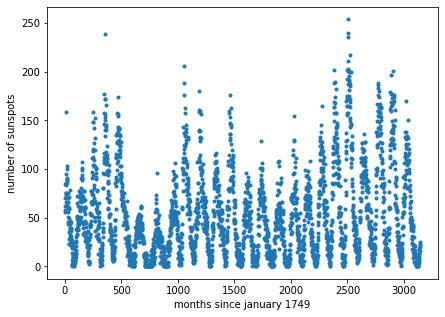

In [ ]:
fig, ax = plt.subplots(figsize=(7,5))

ax.scatter(month, sunspots, marker='.')
ax.set_xlabel(r'months since january 1749')
ax.set_ylabel(r'number of sunspots')
plt.show()

and a plot showing the same dataset is

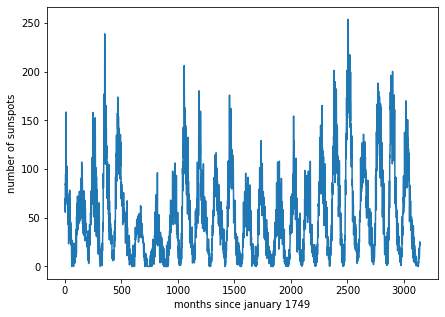

In [ ]:
fig, ax = plt.subplots(figsize=(7,5))

ax.plot(month, sunspots)
ax.set_xlabel(r'months since january 1749')
ax.set_ylabel(r'number of sunspots')
plt.show()

#### Maximum and Minimum

In [ ]:
np.ndarray.max(sunspots)

253.8

In [ ]:
np.ndarray.min(sunspots)

0.0

---
#### Mean and Weighted Average
The function `numpy.mean()` returns the arithmetic average of the array elements.

https://numpy.org/doc/stable/reference/generated/numpy.mean.html?highlight=mean#numpy.mean





\begin{equation}
 \text{mean} = \frac{\sum x_i}{N}
\end{equation}


The monthly mean number of spots in the time period of the data set is


In [ ]:
mean_sunspots = np.mean(sunspots)
mean_sunspots

51.924498886414256

The function `numpy.average()` returns the weighted average of the array elements.

https://numpy.org/doc/stable/reference/generated/numpy.average.html?highlight=average#numpy.average

Including a weight function with values $w_i$, this function uses the formula

\begin{equation}
 \text{average} = \frac{\sum x_i w_i}{\sum w_i}
\end{equation}


In [ ]:
w = sunspots/np.ndarray.max(sunspots)
w

array([0.2285264 , 0.24665091, 0.27580772, ..., 0.09929078, 0.09259259,
       0.08510638])

In [ ]:
np.average(sunspots, weights=w)

89.74573872218345

If we do not include the weights or if all weights are equal, the average is equivalent to the mean

In [ ]:
np.average(sunspots)

51.924498886414256

#### Median and Mode

The function `numpy.median()` returns the median of the array elements along a given axis. 

Given a vector V of length N, the median of V is the middle value of a sorted copy of V, when N is odd, and the average of the two middle values of the sorted copy of V when N is even.

https://numpy.org/doc/stable/reference/generated/numpy.median.html

In [ ]:
np.median(sunspots)

41.5

The mode corresponds to the value ocurring most frequently in the dataset and it can be seen as the location of the peak of the histogram of the data.

Although the `numpy` package does not have a mode function, we can use the function `scipy.mode()`to calculate the modal value. 


In [ ]:
from scipy import stats 

stats.mode(sunspots)

ModeResult(mode=array([0.]), count=array([67]))

This result indicates that the mode is the number $0.$ and that it appears 67 times in the sunspots dataset.

A histogram may help to show the behavior of the data,

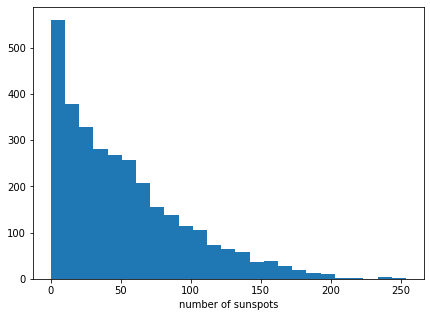

In [ ]:
fig, ax = plt.subplots(figsize=(7,5))

ax.hist(sunspots, bins=25)
ax.set_xlabel(r'number of sunspots')
ax.set_ylabel(r'')
plt.show()

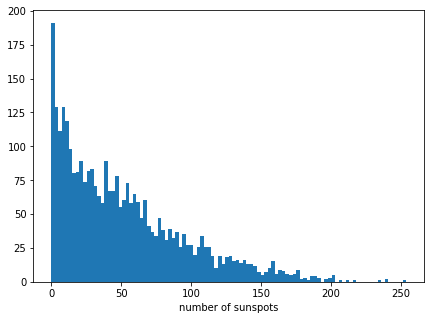

In [ ]:
fig, ax = plt.subplots(figsize=(7,5))

ax.hist(sunspots, bins=100)
ax.set_xlabel(r'number of sunspots')
ax.set_ylabel(r'')
plt.show()

## Astrophysical Signals

In astrophysics, it is usual to detect signals immersed in noise. 
For example, in radioastronomy, the emission of sources such as radio-galaxies, pulsars, supernova remnants, etc. are received by radio-telescopes in Earth. they detect emission at frequencies in the order of megahertz, which is similar to many radio stations and therefore, the signal is immersed in a lot of noise!

The flux density of these signals is measured in *Janskys* (Jy), which is equivalent to 

\begin{equation}
1 \text{ Jansky} = 10^{-26} \frac{\text{Watts}}{\text{m}^2\text{ Hz}}
\end{equation}

Hence, flux is a measure of the spectral power received by a telescope detector of unit projected area. 

Usually, astrophysical sources have flux densities much smaller than the noise around them.

| Source | Flux Density (Jy) |
|:--------|-------------------:|
|Crab Pulsar at 1.4GHz|$\sim 0.01$|
|Milky Way at 10 GHz|$\sim 2 \times 10^3$|
|Sun at 10 GHz|$\sim 4 \times 10^6$|
|Mobile Phone| $\sim 1.1 \times 10^8$|



Consider a synthetic signal with the Gaussian form, 

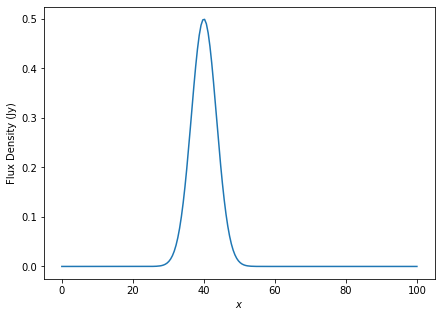

In [ ]:
x = np.linspace(0, 100, 200)
y = 0.5*np.exp(-(x-40)**2./25.)

fig, ax = plt.subplots(figsize=(7,5))

ax.plot(x,y)
ax.set_xlabel(r'$x$')
ax.set_ylabel(r'Flux Density (Jy)')
plt.show()


Now, we will add some random noise by defining two random arrays

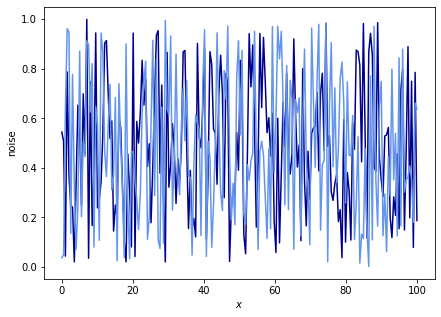

In [ ]:
noise1 = np.random.rand(200)
noise2 = np.random.rand(200)

fig, ax = plt.subplots(figsize=(7,5))
ax.plot(x,noise1, color='darkblue')
ax.plot(x,noise2, color='cornflowerblue')

ax.set_xlabel(r'$x$')
ax.set_ylabel(r'noise')
plt.show()

We add these random noise arrays to the Gaussian profile to obtain

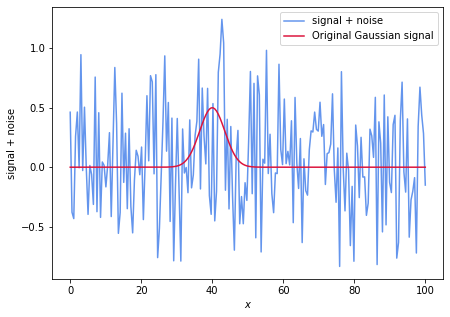

In [ ]:
rawsignal = y + (noise1 - noise2)

fig, ax = plt.subplots(figsize=(7,5))
ax.plot(x,rawsignal, label='signal + noise', color='cornflowerblue')
ax.plot(x,y, label='Original Gaussian signal', color='crimson')
ax.set_xlabel(r'$x$')
ax.set_ylabel(r'signal + noise')
plt.legend()
plt.show()

It is clear that the Gaussian profile is completely hidden into the noise.

### Application of the Statistical Concepts. Extracting a Signal from the Noise.

Now we will use some statistic concepts such as mean and median to isolate the signal from the noise. First, let us create 9 of such signal + noise synthetic profiles.

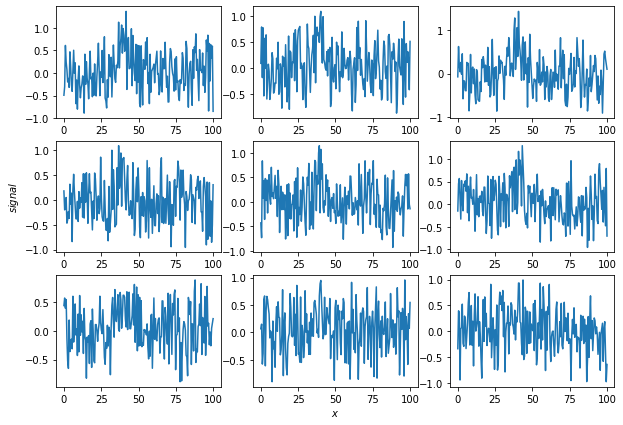

In [ ]:
n = 9 # Number of profiles
rawprofiles = np.zeros([n,200])
for i in range(n):
  rawprofiles[i] = y + ( np.random.rand(200) - np.random.rand(200) )

fig, ax = plt.subplots(3,3, figsize=(10,7))

ax[0,0].plot(x,rawprofiles[0])
ax[0,1].plot(x,rawprofiles[1])
ax[0,2].plot(x,rawprofiles[2])
ax[1,0].plot(x,rawprofiles[3])
ax[1,1].plot(x,rawprofiles[4])
ax[1,2].plot(x,rawprofiles[5])
ax[2,0].plot(x,rawprofiles[6])
ax[2,1].plot(x,rawprofiles[7])
ax[2,2].plot(x,rawprofiles[8])

ax[2,1].set_xlabel(r'$x$')
ax[1,0].set_ylabel(r'$signal$')
plt.show()

The question here is ¿How can we recover the original signal from these profiles?

**Stacking** the profiles (signal+noise) will provide a method to recover the signal.

#### Stacking using the Mean 

Since the profiles have a random noise, when adding regions with only noise, the mean of the random numbers cancel out. On the other hand, when we add regions in which there is some signal data, the mean adds together, increasing the so-called **signal to noise** ratio.

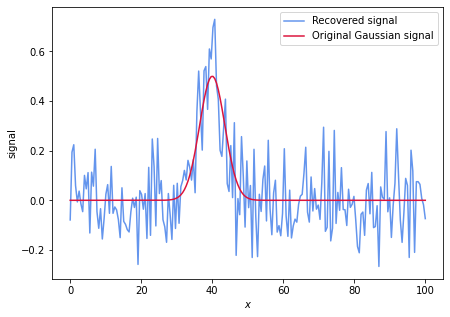

In [ ]:
recovered_signal = np.mean(rawprofiles, axis=0)

fig, ax = plt.subplots(figsize=(7,5))
ax.plot(x,recovered_signal, label='Recovered signal', color='cornflowerblue')
ax.plot(x,y, label='Original Gaussian signal', color='crimson')
ax.set_xlabel(r'$x$')
ax.set_ylabel(r'signal')
plt.legend()
plt.show()

It is clear that the recovered signal is not perfect, although the Gaussian profile seems to be present.

Taking not 9 but 100 synthetic profiles, the stacking method gives a much better result for the recovered signal.

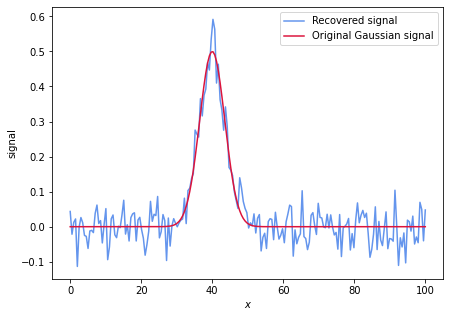

In [ ]:
n = 100
rawprofiles = np.zeros([n,200])
for i in range(n):
  rawprofiles[i] = y + ( np.random.rand(200) - np.random.rand(200) )

recovered_signal = np.mean(rawprofiles, axis=0)

fig, ax = plt.subplots(figsize=(7,5))
ax.plot(x,recovered_signal, label='Recovered signal', color='cornflowerblue')
ax.plot(x,y, label='Original Gaussian signal', color='crimson')
ax.set_xlabel(r'$x$')
ax.set_ylabel(r'signal')
plt.legend()
plt.show()

Now, the Gaussian original signal is evident!

#### Stacking using the Median 

Another form to calcualte the stack is using the median instead of the mean. When a distribution is symmetric the mean and the median are equivalent. However, if the distribution is asymmetric, or when there are significan outliers, the median can be a much better indicator of the central value.

Hence, although our random noise is expected to be a symmetric distribution around the zero  value, there may exist outliers that affect the result of the mean. Therefore we will make a median stacking of 9 signal+noise profiles to compare the results.

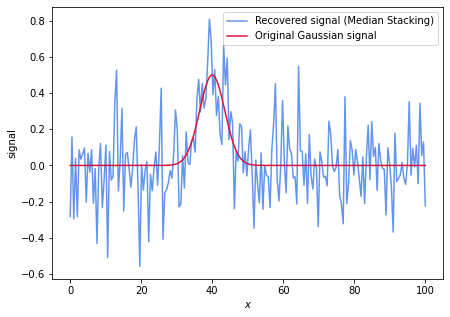

In [ ]:
n = 9
rawprofiles = np.zeros([n,200])
for i in range(n):
  rawprofiles[i] = y + ( np.random.rand(200) - np.random.rand(200) )

recovered_signal = np.median(rawprofiles, axis=0)

fig, ax = plt.subplots(figsize=(7,5))
ax.plot(x,recovered_signal, label='Recovered signal (Median Stacking)', color='cornflowerblue')
ax.plot(x,y, label='Original Gaussian signal', color='crimson')
ax.set_xlabel(r'$x$')
ax.set_ylabel(r'signal')
plt.legend()
plt.show()

Note that the result is almost the same as that obtained with the mean stacking (the reason may be that the noise distribution is symmetric w.r.t. zero). Now we will consider 100 profiles,

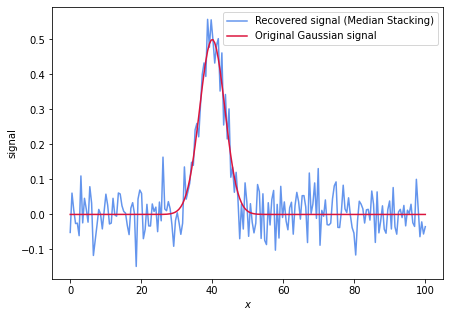

In [ ]:
n = 100
rawprofiles = np.zeros([n,200])
for i in range(n):
  rawprofiles[i] = y + ( np.random.rand(200) - np.random.rand(200) )

recovered_signal = np.median(rawprofiles, axis=0)

fig, ax = plt.subplots(figsize=(7,5))
ax.plot(x,recovered_signal, label='Recovered signal (Median Stacking)', color='cornflowerblue')
ax.plot(x,y, label='Original Gaussian signal', color='crimson')
ax.set_xlabel(r'$x$')
ax.set_ylabel(r'signal')
plt.legend()
plt.show()

Once again, the result is not much different from that obtained using the mean stacking.